In [27]:
import identification
import matplotlib.pyplot as plt
# import pprint
import control
import scipy
import numpy as np
import pandas as pd
import sympy as sp

In [2]:
data = identification.run()

s_20_to_30
{'delta_h': 34,
 'delta_pwm': 10,
 'delta_t': 127,
 'end_idx': 359,
 'k': 3.4,
 'start_idx': 232,
 't1_SM': 8,
 't2_SM': 32,
 'tau_SM': 36.0,
 'teta_SM': 0,
 'tf': TransferFunction(array([3.4]), array([36.,  1.])),
 'yt1_SM': 9.622000000000002,
 'yt2_SM': 21.488}
s_30_to_40
{'delta_h': 47,
 'delta_pwm': 10,
 'delta_t': 85,
 'end_idx': 443,
 'k': 4.7,
 'start_idx': 358,
 't1_SM': 10,
 't2_SM': 31,
 'tau_SM': 31.5,
 'teta_SM': 0,
 'tf': TransferFunction(array([4.7]), array([31.5,  1. ])),
 'yt1_SM': 13.301000000000002,
 'yt2_SM': 29.704}
s_40_to_50
{'delta_h': 44,
 'delta_pwm': 10,
 'delta_t': 155,
 'end_idx': 597,
 'k': 4.4,
 'start_idx': 442,
 't1_SM': 17,
 't2_SM': 34,
 'tau_SM': 25.5,
 'teta_SM': 8.5,
 'tf': TransferFunction(array([4.4]), array([25.5,  1. ])),
 'yt1_SM': 13.301000000000002,
 'yt2_SM': 29.704}
s_50_to_60
{'delta_h': 61,
 'delta_pwm': 10,
 'delta_t': 303,
 'end_idx': 899,
 'k': 6.1,
 'start_idx': 596,
 't1_SM': 21,
 't2_SM': 64,
 'tau_SM': 64.5,
 'teta_SM': 

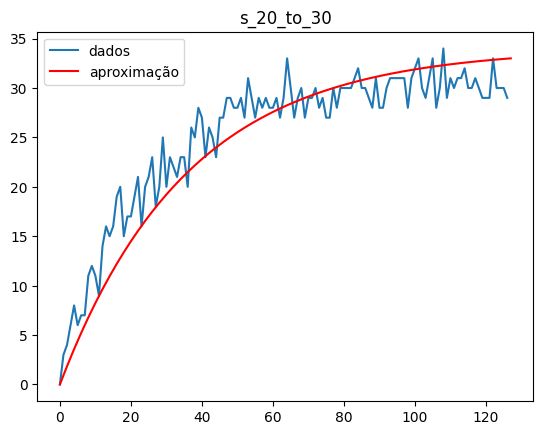

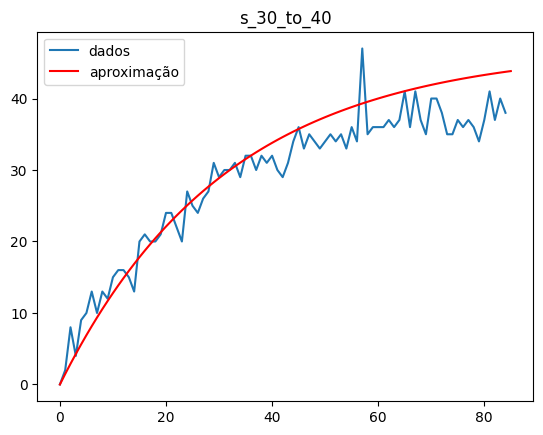

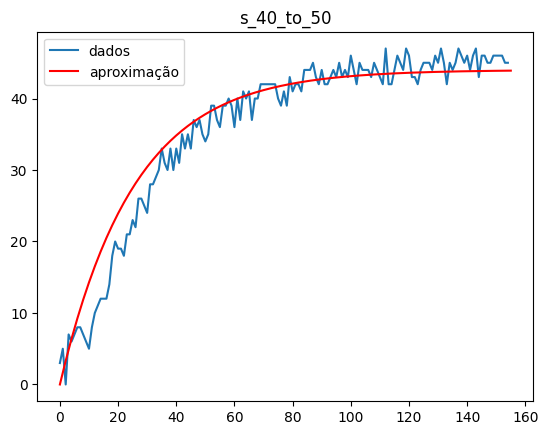

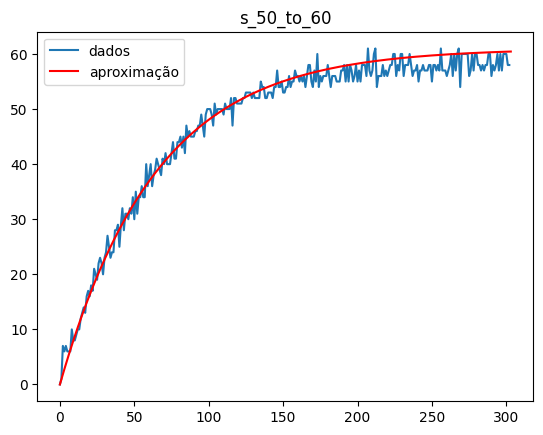

,start_idx,end_idx,delta_pwm,delta_t,delta_h
s_20_to_30,232,359,10,127,34
s_30_to_40,358,443,10,85,47
s_40_to_50,442,597,10,155,44
s_50_to_60,596,899,10,303,61


,k,yt1_SM,t1_SM,yt2_SM,t2_SM,tau_SM,teta_SM
s_20_to_30,3.4,9.622,8,21.488,32,36.0,0.0
s_30_to_40,4.7,13.301,10,29.704,31,31.5,0.0
s_40_to_50,4.4,13.301,17,29.704,34,25.5,8.5
s_50_to_60,6.1,17.263,21,38.552,64,64.5,0.0


\begin{tabular}{lrrrrr}
\toprule
{} &  start\_idx &  end\_idx &  delta\_pwm &  delta\_t &  delta\_h \\
\midrule
s\_20\_to\_30 &        232 &      359 &         10 &      127 &       34 \\
s\_30\_to\_40 &        358 &      443 &         10 &       85 &       47 \\
s\_40\_to\_50 &        442 &      597 &         10 &      155 &       44 \\
s\_50\_to\_60 &        596 &      899 &         10 &      303 &       61 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrrrr}
\toprule
{} &    k &  yt1\_SM &  t1\_SM &  yt2\_SM &  t2\_SM &  tau\_SM &  teta\_SM \\
\midrule
s\_20\_to\_30 &  3.4 &   9.622 &      8 &  21.488 &     32 &    36.0 &      0.0 \\
s\_30\_to\_40 &  4.7 &  13.301 &     10 &  29.704 &     31 &    31.5 &      0.0 \\
s\_40\_to\_50 &  4.4 &  13.301 &     17 &  29.704 &     34 &    25.5 &      8.5 \\
s\_50\_to\_60 &  6.1 &  17.263 &     21 &  38.552 &     64 &    64.5 &      0.0 \\
\bottomrule
\end{tabular}

s_20_to_30:


C:\Users\luiz\AppData\Local\Temp\ipykernel_3396\4238251358.py:26: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df1.to_latex())
C:\Users\luiz\AppData\Local\Temp\ipykernel_3396\4238251358.py:27: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df2.to_latex())


TransferFunction(array([3.4]), array([36.,  1.]))

s_30_to_40:


TransferFunction(array([4.7]), array([31.5,  1. ]))

s_40_to_50:


TransferFunction(array([4.4]), array([25.5,  1. ]))

s_50_to_60:


TransferFunction(array([6.1]), array([64.5,  1. ]))

In [38]:
di = {}
for key, value in data.items():
    value.get('data').plot(
        title=key)
    # plt.plot(value.get('data').index, control.forced_response(value.get('tf'), T=value.get('data').index, U=value.get('delta_pwm')))
    plt.plot(
        *control.forced_response(
            value.get('tf'), 
            T=np.linspace(0, value.get('delta_t'), value.get('delta_t')+1), 
            U=value.get('delta_pwm'), 
        ), 
        'red'
    )
    di[key] = {v_key: v_value for v_key, v_value in value.items() if (v_key != 'data') and (v_key != 'tf')}
    plt.legend(('dados', 'aproximação'))
    plt.savefig(f'plot_{key}.jpg', dpi=300)
    plt.show()
    # display(pd.DataFrame())
    print('\n')

df = pd.DataFrame(data=list(di.values()), index=list(di.keys()))
df1 = df.loc[:, df.columns[:5]]
df2 = df.loc[:, df.columns[5:]]
display(df1)
display(df2)
print(df1.to_latex())
print(df2.to_latex())

for key, value in data.items():
    print(f'{key}:')
    display(value.get('tf'))

s_50_to_60


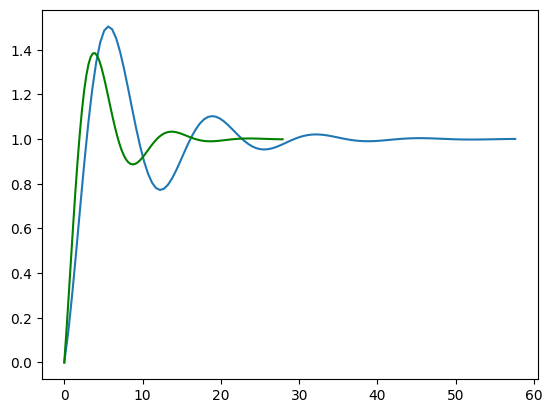

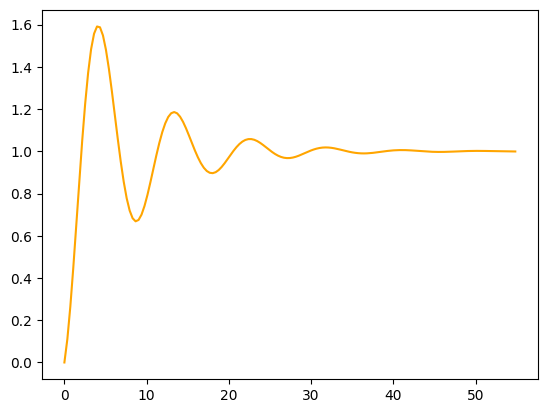

In [4]:
key, value = 's_50_to_60', data.get('s_50_to_60')
print(key)
# plt.plot(value.get('data').index, control.forced_response(value.get('tf'), T=value.get('data').index, U=value.get('delta_pwm')))
kp = 2.373
ki = 2.53
plt.plot(
    *control.step_response(
        control.tf([6.1*kp, 6.1*ki], [64.5, (6.1*kp + 1), 6.1*ki])
)
)

kp = 5.0754
ki = 4.9114
plt.plot(
    *control.step_response(
        control.tf([6.1*kp, 6.1*ki], [64.5, (6.1*kp + 1), 6.1*ki])),
    color='green'
)
plt.show()

kp = 2.5
ki = 5.07
plt.plot(
    *control.step_response(
        control.tf([6.1*kp, 6.1*ki], [64.5, (6.1*kp + 1), 6.1*ki])),
    color='orange'
)
plt.show()


print('\n')


s_50_to_60


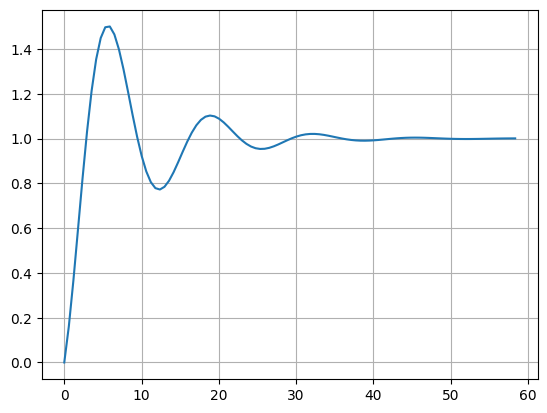

TransferFunction(array([6.1]), array([64.5,  1. ]))

In [5]:
key, value = 's_50_to_60', data.get('s_50_to_60')
print(key)
# plt.plot(value.get('data').index, control.forced_response(value.get('tf'), T=value.get('data').index, U=value.get('delta_pwm')))
kp = 2.373
ki = 2.53
plt.plot(
        *scipy.signal.step(scipy.signal.lti([6.1*kp, 6.1*ki], [64.5, (6.1*kp + 1), 6.1*ki]))
)
plt.grid()
plt.show()
display(value.get('tf'))
print('\n')


s_50_to_60
S0=50.42299404282669%, Ereg=0.0748388692703994%, ta=20.89262407856248s




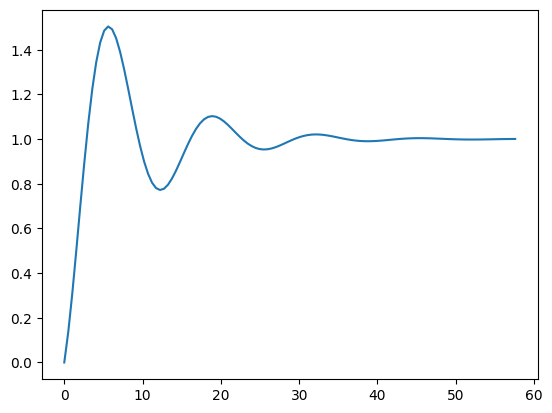

In [6]:
key, value = 's_50_to_60', data.get('s_50_to_60')
print(key)
# plt.plot(value.get('data').index, control.forced_response(value.get('tf'), T=value.get('data').index, U=value.get('delta_pwm')))
#for kp, ki in zip(np.linspace(0,10, 11), np.linspace(0,10, 101)):
kp = 2.373
ki = 2.53

grf = control.step_response(
        control.tf([6.1*kp, 6.1*ki], [64.5, (6.1*kp + 1), 6.1*ki]))

S0 = (max(grf[1])-1)*100
Ereg = (grf[1][-1]-1)*100

ta = None
for idx, val in zip(reversed(grf[0]), reversed(grf[1])):
    if (val-1)*100 > 5:
        ta = idx
        break

print(f"{S0=}%, {Ereg=}%, {ta=}s")
plt.plot(
    *grf
)



print('\n')

dhdt_flow: d*h/dt = (Ve - Vs)/A
in_flow: Ve = K*U
out_flow1: Vs = a*v
out_flow2: Vs = sqrt(2)*a*sqrt(g)*sqrt(h)
out_flow3: Vs = sqrt(2)*a*sqrt(g)*sqrt(pf/(g*ro))
dhdt_flow_detailed: d*h/dt = (K*U - sqrt(2)*a*sqrt(g)*sqrt(h))/A
h_subs: h = Delta_h + h0
U_subs: U = Delta_U + U0
delta_flow_detailed: d*(Delta_h + h0)/dt = (K*(Delta_U + U0) - sqrt(2)*a*sqrt(g)*sqrt(Delta_h + h0))/A
equilibrium: K*U0 = sqrt(2)*a*sqrt(g*h0)
linearize: A*Delta_h*d/dt = Delta_U*K - sqrt(2)*Delta_h*a*sqrt(g)/(2*sqrt(h0)) + K*U0 - sqrt(2)*a*sqrt(g*h0)
linearize_equilibrium: A*Delta_h*d/dt = Delta_U*K - sqrt(2)*Delta_h*a*sqrt(g)/(2*sqrt(h0))
alpha_subs: alpha = sqrt(2)*a*sqrt(g)/(2*sqrt(h0))
linearize_equilibrium_alpha_subs: A*Delta_h*d/dt = Delta_U*K - Delta_h*alpha
laplace_transform: A*Delta_h*s = Delta_U*K - Delta_h*alpha
tau_subs: tau = A/alpha
Ke_subs: Ke = K/alpha
laplace_tau_Ke_subs_simplify: Delta_h = Delta_U*Ke/(s*tau + 1)
tf: Delta_h/Delta_U = Ke/(s*tau + 1)
s_20_to_30 :


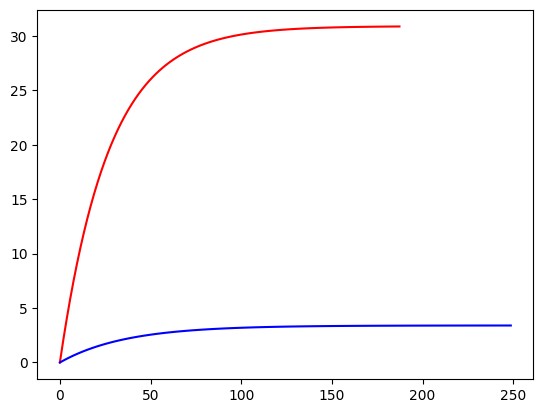

theoretical modeling (red):


TransferFunction(array([30.89457128]), array([27.11160912,  1.        ]))

empiric modeling (blue):


TransferFunction(array([3.4]), array([36.,  1.]))

s_30_to_40 :


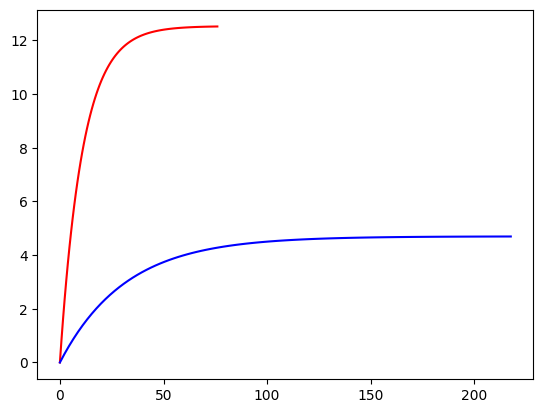

theoretical modeling (red):


TransferFunction(array([12.53479927]), array([10.99994478,  1.        ]))

empiric modeling (blue):


TransferFunction(array([4.7]), array([31.5,  1. ]))

s_40_to_50 :


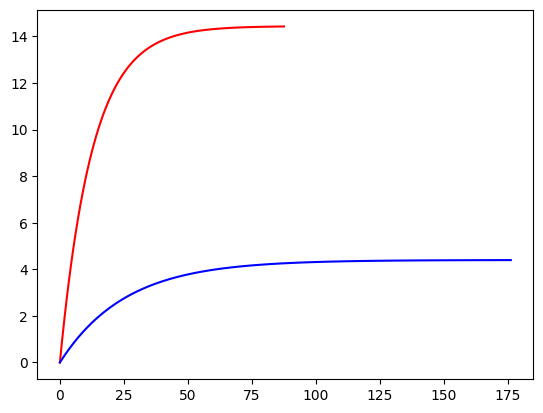

theoretical modeling (red):


TransferFunction(array([14.44008225]), array([12.67193067,  1.        ]))

empiric modeling (blue):


TransferFunction(array([4.4]), array([25.5,  1. ]))

s_50_to_60 :


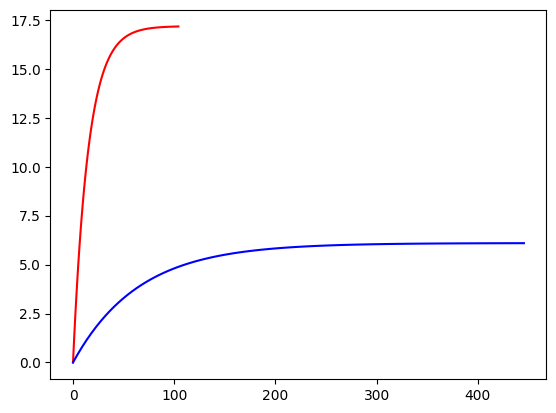

theoretical modeling (red):


TransferFunction(array([17.1800144]), array([15.07636506,  1.        ]))

empiric modeling (blue):


TransferFunction(array([6.1]), array([64.5,  1. ]))

In [7]:
from modeling import flow_rate_equations, evaluate_tf_constants

flw_eqs = flow_rate_equations()

for name, h in {"s_20_to_30": 0.065, "s_30_to_40": 0.0107, "s_40_to_50": 0.0142, "s_50_to_60": 0.0201}.items():

    theo_tf_symp = evaluate_tf_constants(flw_eqs, h0=h, a=4.037088288e-5, A=0.009506, K=0.0009027*12)
    theo_tf_K = float(theo_tf_symp.args[0])
    theo_tf_tau = float(theo_tf_symp.args[1].base.args[1].args[0])
    theo_tf = control.tf(theo_tf_K, [theo_tf_tau, 1])
    print(name, ':')
    plt.plot(*control.step_response(theo_tf), color='red')
    plt.plot(*control.step_response(data.get(name).get('tf')), color='blue')
    plt.show()
    print("theoretical modeling (red):")
    display(theo_tf)
    print("empiric modeling (blue):")
    display(data.get(name).get('tf'))